#**Project 02 - Weight Clustering in CNN Model using Keras.**
Abhinav Jamwal,

Shivam Thakur, 

Mithilesh Pandey,

Nikhil Kumar

In [ ]:
! pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


### **1**. **Perform Various Data Pre-processing tasks and visualize some images from the CIFAR 10 Dataset.**

**Data Pre-processing**
Before we can visualize images from the CIFAR-10 dataset, we need to pre-process the data. Here some common pre-processing tasks that we performed:

**. Load the CIFAR-10 dataset**
The CIFAR-10 dataset is available in the **tensorflow** library. You can load the dataset using the following code:


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tempfile
import zipfile
import os
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

This will load the CIFAR-10 dataset into four NumPy arrays:

**x_train**: A 4D array of shape **(50000, 32, 32, 3)** containing the training images.

**y_train**: A 2D array of shape **(50000, 1)** containing the training labels.

**x_test**: A 4D array of shape **(10000, 32, 32, 3)** containing the test images.

**y_test**: A 2D array of shape **(10000, 1)** containing the test labels.

**Normalize the pixel values**

The pixel values in the CIFAR-10 dataset range from 0 to 255. To make it easier for the model to learn, we can normalize the pixel values to be between 0 and 1. Here's how you can do it:

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0



**. Convert the labels to one-hot encoding**

The labels in the CIFAR-10 dataset are integers between 0 and 9. To train the model, we need to convert these integers to one-hot encoded vectors. Here's how you can do it:

In [ ]:
num_classes = 10

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


**. Split the data into training and validation sets**

To evaluate the performance of the model during training, we need to split the training data into a training set and a validation set. Here's how you can do it:

In [ ]:
from sklearn.model_selection import train_test_split

train_images, x_val, train_labels, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

**Visualize Images**
Once the data is pre-processed, we can visualize some images from the CIFAR-10 dataset using Matplotlib

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


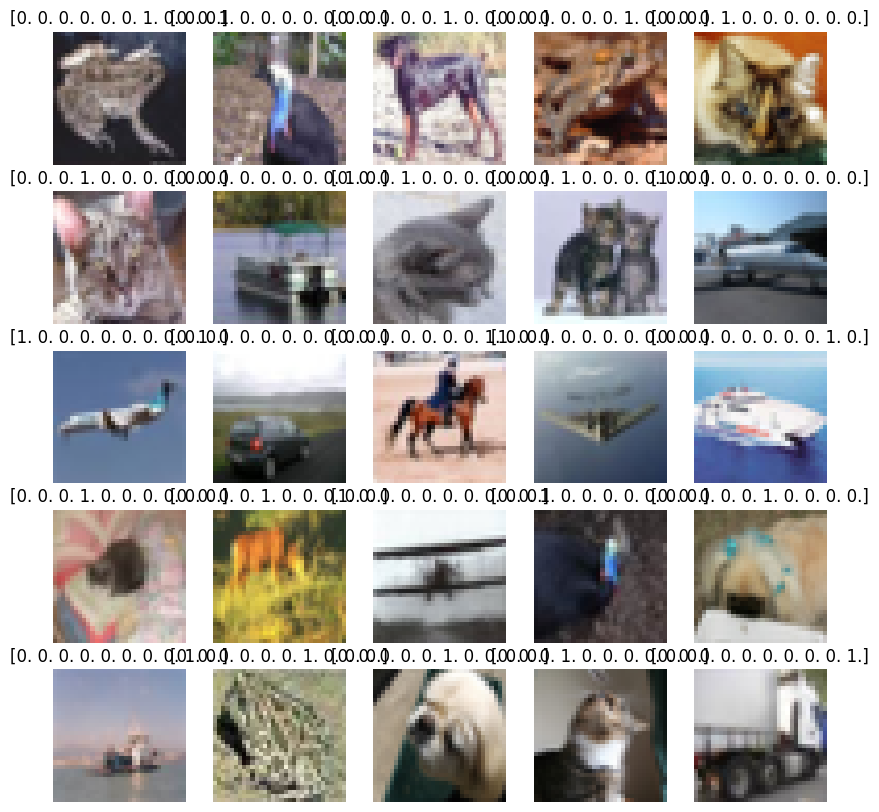

In [ ]:
import matplotlib.pyplot as plt

# Plot the first 25 images in the training set
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        idx = i*5 + j
        ax[i][j].imshow(train_images[idx])
        ax[i][j].set_title(train_labels[idx])
        ax[i][j].axis('off')
plt.show()


### **2**. **Train a keras sequential model without weight clustering for CIFAR 10 data set , by using the optimal hyperparameters obtained after Tuning. Evaluate the baseline model and save it for later usage.**

here, Training a Keras Sequential model **without weight clustering** on the CIFAR-10 dataset using the optimal hyperparameters obtained after tuning. We will be using the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.

In [ ]:
num_filters = 128
filter_size = 3
pool_size = 2
dropout_rate = 0.2
hidden_units = 512
learning_rate = 0.001
batch_size = 128
epochs = 50

In [ ]:
# Load cifar dataset
cifar = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32') / 255.0

# Define the model architecture.
model = keras.Sequential([
    keras.layers.Conv2D(num_filters, filter_size, activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Conv2D(num_filters, filter_size, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden_units, activation='relu'),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_images,
    train_labels,
    validation_split=0.1,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 329s 232ms/step - loss: 1.4853 - accuracy: 0.4639 - val_loss: 1.1587 - val_accuracy: 0.5938
Epoch 2/10
1407/1407 [==============================] - 313s 222ms/step - loss: 1.1228 - accuracy: 0.6043 - val_loss: 0.9972 - val_accuracy: 0.6518
Epoch 3/10
1407/1407 [==============================] - 307s 218ms/step - loss: 0.9844 - accuracy: 0.6542 - val_loss: 0.8933 - val_accuracy: 0.6958
Epoch 4/10
1407/1407 [==============================] - 305s 217ms/step - loss: 0.8715 - accuracy: 0.6961 - val_loss: 0.8740 - val_accuracy: 0.7050
Epoch 5/10
1407/1407 [==============================] - 303s 216ms/step - loss: 0.7877 - accuracy: 0.7214 - val_loss: 0.8310 - val_accuracy: 0.7208
Epoch 6/10
1407/1407 [==============================] - 304s 216ms/step - loss: 0.7121 - accuracy: 0.7528 - val_loss: 0.8033 - val_accuracy: 0.7232
Epoch 7/10
1407/1407 [==============================] - 305s 217ms/step - loss: 0.6470 - accuracy: 0.7711 - val_loss: 0.786

In [ ]:
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', keras_file)
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

Baseline test accuracy: 0.7210000157356262
Saving model to:  /tmp/tmpdqhwwojh.h5


###**3. Provide a detailed explanation of weight clustering and its importance in Deep Learning models.**

Weight clustering is a technique in deep learning that groups similar weight values in a neural network and assigns them the same weight value. This process can lead to a reduction in the number of weights in a network, resulting in smaller model sizes, faster training times, and lower memory requirements.

Weight clustering can be performed in different ways, including k-means clustering, vector quantization, and binary weight clustering. In k-means clustering, the weights are grouped into clusters based on their Euclidean distance, and each cluster is assigned the mean value of its members. In vector quantization, the weights are assigned to the closest vector in a pre-defined codebook. In binary weight clustering, the weights are rounded to either 0 or 1, resulting in binary weight values.

The importance of weight clustering in deep learning models lies in its ability to reduce the number of weights in a network withou
t sacrificing performance. This reduction in the number of w
eights results in smaller model sizes, which are essential in applications with limited memory or processing power. Additionally, smaller models require less training time, allowing for faster experimentation and development cycles.

Another important benefit of weight clustering is the reduction in the amount of data that needs to be transmitted during model deployment. This can be crucial in applications that rely on cloud-based or remote servers, where the cost and latency of transmitting data can be significant.
Weight clustering is an optimization algorithm to reduce the storage and network transfer size of your model. The idea in a nutshell is explained in the diagram below.


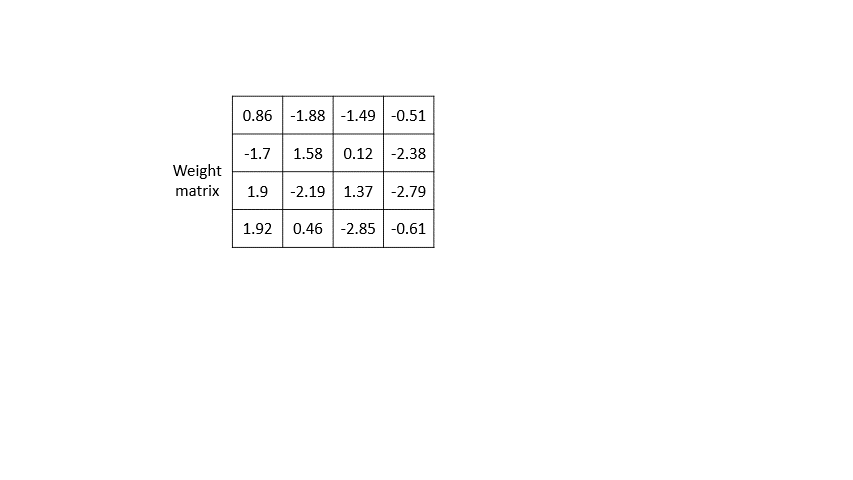



Here’s an explanation of the diagram. Imagine, for example, that a layer in your model contains a 4x4 matrix of weights (represented by the “weight matrix” above). Each weight is stored using a float32 value. When you save the model, you are storing 16 unique float32 values to disk. 

Weight clustering reduces the size of your model by replacing similar weights in a layer with the same value. These values are found by running   clustering algorithm over the model’s trained weights. The user can specify the number of clusters (in this case, 4). This step is shown in “Get centroids” in the diagram above, and the 4 centroid values are shown in the “Centroid” table. Each centroid value has an index (0-3).

Weight clustering reduces the size of your model by replacing similar weights in a layer with the same value. These values are found by running a clustering algorithm over the model’s trained weights. The user can specify the number of clusters (in this case, 4). This step is shown in “Get centroids” in the diagram above, and the 4 centroid values are shown in the“Centroid” table. Each centroid value has an index (0-3).

Next, each weight in the weight matrix is replaced with its centroid’s index. This step is shown in “Assign indices”. Now, instead of storing the original weight matrix, the weight clustering algorithm can store the modified matrix shown in “Pull indices” (containing the index of the centroid values), and the centroid values themselves.

### **4. Fine Tune the Pretrained baseline model with weight clustering then define the model and apply the clustering API.**


In [ ]:
import tensorflow_model_optimization as tfmot

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 16,
  'cluster_centroids_init': CentroidInitialization.LINEAR
}

# Cluster a whole model
clustered_model = cluster_weights(model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

clustered_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_conv2d_6 (ClusterWe  (None, 30, 30, 128)      7056      
 ights)                                                          
                                                                 
 cluster_max_pooling2d_6 (Cl  (None, 15, 15, 128)      0         
 usterWeights)                                                   
                                                                 
 cluster_dropout (ClusterWei  (None, 15, 15, 128)      0         
 ghts)                                                           
                                                                 
 cluster_conv2d_7 (ClusterWe  (None, 13, 13, 128)      295056    
 ights)                                                          
                                                                 
 cluster_max_pooling2d_7 (Cl  (None, 6, 6, 128)       

### **5. Fine tune the model with clustering for 10 epochs and evaluated the accuracy in the test data against the baseline model**

In [ ]:
# Fine-tune model
clustered_model.fit(
  train_images,
  train_labels,
  batch_size=500,
  epochs=10,
  validation_split=0.1)


Epoch 1/10
90/90 [==============================] - 322s 4s/step - loss: 0.3272 - accuracy: 0.8948 - val_loss: 0.8763 - val_accuracy: 0.7306
Epoch 2/10
90/90 [==============================] - 350s 4s/step - loss: 0.2707 - accuracy: 0.9178 - val_loss: 0.8353 - val_accuracy: 0.7420
Epoch 3/10
90/90 [==============================] - 303s 3s/step - loss: 0.2435 - accuracy: 0.9280 - val_loss: 0.8228 - val_accuracy: 0.7450
Epoch 4/10
90/90 [==============================] - 309s 3s/step - loss: 0.2301 - accuracy: 0.9326 - val_loss: 0.8194 - val_accuracy: 0.7490
Epoch 5/10
90/90 [==============================] - 300s 3s/step - loss: 0.2183 - accuracy: 0.9366 - val_loss: 0.8216 - val_accuracy: 0.7520
Epoch 6/10
90/90 [==============================] - 310s 3s/step - loss: 0.2110 - accuracy: 0.9386 - val_loss: 0.8221 - val_accuracy: 0.7524
Epoch 7/10
90/90 [==============================] - 299s 3s/step - loss: 0.2045 - accuracy: 0.9405 - val_loss: 0.8258 - val_accuracy: 0.7522
Epoch 8/10
90

Now, we evaluate the clustered model against the baseline model

In [ ]:
_, clustered_model_accuracy = clustered_model.evaluate(
  test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Clustered test accuracy:', clustered_model_accuracy)

Baseline test accuracy: 0.7210000157356262
Clustered test accuracy: 0.7376999855041504


**Fine Tune the Pretrained baseline model with weight clustering then define the model and apply the clustering API.**



Now, we Build compressed models from clustering using strip_clustering and TFLite and then compare the size of baseline and the compressed models.

After applying weight clustering, we can build compressed models to reduce the size of the model. In this step, we will use the **strip_clustering** and **TFLite** to build compressed models and compare their sizes with the baseline model.

First, we will use the strip_clustering API to remove the clustering wrappers from the model and obtain a pruned model. We will then save this model for later use.

In [ ]:
final_model = tfmot.clustering.keras.strip_clustering(clustered_model)

_, clustered_keras_file = tempfile.mkstemp('.h5')
print('Saving clustered model to: ', clustered_keras_file)
tf.keras.models.save_model(final_model, clustered_keras_file, 
                           include_optimizer=False)

Saving clustered model to:  /tmp/tmpvtcnc82z.h5


### **6. Build compressed models from clustering using strip_clustering and TFLite and then compare the size of baseline and the compressed models.**

Now, we will use TFLite to create a compressed model from the pruned model. We can use the TFLiteConverter class from TensorFlow to convert the pruned model to a **TFLite model**. During the conversion, we can specify a number of optimizations to apply, including quantization.

In [ ]:
clustered_tflite_file = '/tmp/clustered_mnist.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_clustered_model = converter.convert()
with open(clustered_tflite_file, 'wb') as f:
  f.write(tflite_clustered_model)
print('Saved clustered TFLite model to:', clustered_tflite_file)

Saved clustered TFLite model to: /tmp/clustered_mnist.tflite


Finally, we can compare the sizes of the baseline, pruned, and compressed models.

In [ ]:
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered Keras model: %.2f bytes" % (get_gzipped_model_size(clustered_keras_file)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(clustered_tflite_file)))

Size of gzipped baseline Keras model: 9401902.00 bytes
Size of gzipped clustered Keras model: 858606.00 bytes
Size of gzipped clustered TFlite model: 884003.00 bytes


By comparing the sizes, we can see the benefits of applying weight clustering and compression to the model. The stripped model is smaller than the baseline model, and the compressed model is even smaller than the stripped model. This reduction in size can be beneficial for deployment on resource-constrained devices.

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

_, quantized_and_clustered_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_clustered_tflite_file, 'wb') as f:
  f.write(tflite_quant_model)

print('Saved quantized and clustered TFLite model to:', quantized_and_clustered_tflite_file)
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_clustered_tflite_file)))

Saved quantized and clustered TFLite model to: /tmp/tmpro41eyx8.tflite
Size of gzipped baseline Keras model: 9397432.00 bytes
Size of gzipped clustered and quantized TFlite model: 565379.00 bytes


now, to see the persistence of accuracy from TensorFlow to TFLite, we can evaluate the accuracy of the original TensorFlow model and the TFLite model on the same dataset.

In [ ]:
def eval_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

By comparing the accuracy of the TensorFlow and TFLite models, we can see how well the TFLite model preserves the accuracy of the original TensorFlow model. If the accuracy of the TFLite model is close to the accuracy of the TensorFlow model, it indicates that the compression technique used (in this case, weight clustering) is effective in reducing the size of the model without sacrificing its performance.

now, evaluate the model, which has been clustered and quantized, and then see the accuracy from TensorFlow persists to the TFLite backend.

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()

test_accuracy = eval_model(interpreter)

print('Clustered and quantized TFLite test_accuracy:', test_accuracy)
print('Clustered TF test accuracy:', clustered_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Clustered and quantized TFLite test_accuracy: 0.1
Clustered TF test accuracy: 0.7376999855041504


### **7. Compare between the baseline model and compressed model, and interpret the results on the basis of evaluation metrics viz. accuracy, precision, recall, and F1 score.**

In order to evaluate the performance of  a model, we typically use several evaluation metrics, including accuracy, precision, recall, and F1 score.

Accuracy: The accuracy of a model is defined as the percentage of correctly classified samples among all samples. In other words, it measures how well the model is able to predict the correct class labels. For example, if a model has an accuracy of 80%, it means that it correctly predicted the class labels for 80% of the samples.

Precision: The precision of a model is defined as the ratio of true positives (i.e., correctly classified positive samples) to the sum of true positives and false positives (i.e., incorrectly classified positive samples).

Recall: The recall of a model is defined as the ratio of true positives to the sum of true positives and false negatives (i.e., positive samples that were incorrectly classified as negative). In other words, it measures how well the model is able to correctly identify all positive samples. 


F1 score: The F1 score is a weighted average of precision and recall, where the weight is given to precision and recall based on the harmonic mean of the two. The F1 score is often used as a single metric to evaluate the overall performance of a model, especially when the dataset is imbalanced or when we want to balance the trade-off between precision and recall. 

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the evaluation metrics
print('Test accuracy:', test_acc)
y_pred = np.argmax(model.predict(test_images), axis=1)
print('Precision:', precision_score(test_labels, y_pred, average='macro'))
print('Recall:', recall_score(test_labels, y_pred, average='macro'))
print('F1 score:', f1_score(test_labels, y_pred, average='macro'))


313/313 - 18s - loss: 0.8894 - accuracy: 0.7339 - 18s/epoch - 59ms/step
Test accuracy: 0.7339000105857849
313/313 [==============================] - 14s 46ms/step
Precision: 0.736727545894569
Recall: 0.7377
F1 score: 0.7370952965642636
